In [1]:
import os
import tflearn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
import pandas as pd

# 데이터 준비

## 데이터 셋 살펴보기

In [3]:
df = pd.read_csv('bitcoin_ticker.csv')
df.head()

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
0,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_eur,1996.72,2029.99,-1.638924,2005.50,2005.56,1950.00,2063.73,2314.500750,2017-05-31 14:59:36,2017-05-31 14:59:36
1,2017-05-31,2017-06-01 00:00:00,bitflyer,btc_jpy,267098.00,269649.00,-0.946045,267124.00,267267.00,267124.00,267267.00,70922.880112,2017-05-31 14:59:36,2017-05-31 14:59:36
2,2017-05-31,2017-06-01 00:00:00,korbit,btc_krw,3003500.00,3140000.00,-4.347134,3003500.00,3004000.00,3002000.00,3209500.00,6109.752872,2017-05-31 14:59:36,2017-05-31 14:59:36
3,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_usd,2237.40,2239.37,-0.087971,2233.09,2237.40,2154.28,2293.46,13681.282017,2017-05-31 14:59:36,2017-05-31 14:59:36
4,2017-05-31,2017-06-01 00:00:00,okcoin,btc_usd,2318.82,2228.70,4.043613,2319.40,2319.99,2129.78,2318.82,4241.641516,2017-05-31 14:59:36,2017-05-31 14:59:36


In [4]:
df.shape

(627190, 14)

In [5]:
df.dtypes

date_id          object
datetime_id      object
market           object
rpt_key          object
last            float64
diff_24h        float64
diff_per_24h    float64
bid             float64
ask             float64
low             float64
high            float64
volume          float64
created_at       object
updated_at       object
dtype: object

In [6]:
df.columns

Index(['date_id', 'datetime_id', 'market', 'rpt_key', 'last', 'diff_24h',
       'diff_per_24h', 'bid', 'ask', 'low', 'high', 'volume', 'created_at',
       'updated_at'],
      dtype='object')

In [7]:
df['market'].unique()

array(['bitstamp', 'bitflyer', 'korbit', 'okcoin'], dtype=object)

In [8]:
df['rpt_key'].unique()

array(['btc_eur', 'btc_jpy', 'btc_krw', 'btc_usd', 'etc_krw', 'eth_btc',
       'eth_krw', 'fx_btc_jpy', 'ltc_usd'], dtype=object)

## 국내 거래소만 보기

In [9]:
df_ko = df[df['market'] == 'korbit']
df_ko.head()
df_ko.shape

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
2,2017-05-31,2017-06-01 00:00:00,korbit,btc_krw,3003500.0,3140000.0,-4.347134,3003500.0,3004000.0,3002000.0,3209500.0,6109.752872,2017-05-31 14:59:36,2017-05-31 14:59:36
5,2017-05-31,2017-06-01 00:00:00,korbit,etc_krw,22740.0,23150.0,-1.771058,22700.0,22730.0,21000.0,25500.0,855853.369886,2017-05-31 14:59:36,2017-05-31 14:59:36
7,2017-05-31,2017-06-01 00:00:00,korbit,eth_krw,311800.0,274500.0,13.588342,311800.0,311950.0,272500.0,336000.0,327416.949269,2017-05-31 14:59:36,2017-05-31 14:59:36
10,2017-05-31,2017-06-01 00:01:00,korbit,etc_krw,22740.0,23010.0,-1.173403,22700.0,22730.0,21000.0,25500.0,855853.369886,2017-05-31 14:59:36,2017-05-31 14:59:36
11,2017-05-31,2017-06-01 00:01:00,korbit,eth_krw,311900.0,272500.0,14.458716,311900.0,311950.0,273000.0,336000.0,326531.242837,2017-05-31 15:00:36,2017-05-31 15:00:36


(188157, 14)

## ETC만 보기

In [10]:
etc = df_ko[df_ko['rpt_key'] == 'etc_krw']
etc.head()
etc.shape

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
5,2017-05-31,2017-06-01 00:00:00,korbit,etc_krw,22740.0,23150.0,-1.771058,22700.0,22730.0,21000.0,25500.0,855853.369886,2017-05-31 14:59:36,2017-05-31 14:59:36
10,2017-05-31,2017-06-01 00:01:00,korbit,etc_krw,22740.0,23010.0,-1.173403,22700.0,22730.0,21000.0,25500.0,855853.369886,2017-05-31 14:59:36,2017-05-31 14:59:36
25,2017-06-01,2017-06-01 00:02:00,korbit,etc_krw,22700.0,23000.0,-1.304348,22700.0,22730.0,21000.0,25500.0,848605.960736,2017-05-31 15:01:36,2017-05-31 15:01:36
35,2017-06-01,2017-06-01 00:03:00,korbit,etc_krw,22700.0,22990.0,-1.261418,22700.0,22730.0,21000.0,25500.0,847135.372966,2017-05-31 15:01:36,2017-05-31 15:02:36
45,2017-06-01,2017-06-01 00:04:00,korbit,etc_krw,22700.0,22900.0,-0.873362,22690.0,22700.0,21000.0,25500.0,846004.624013,2017-05-31 15:03:37,2017-05-31 15:03:37


(62719, 14)

## 전처리

### 필요한 컬럼만 추출

In [11]:
etc = etc[['datetime_id', 'last', 'diff_per_24h', 'low', 'high', 'volume']]
etc.head()

,datetime_id,last,diff_per_24h,low,high,volume
5,2017-06-01 00:00:00,22740.0,-1.771058,21000.0,25500.0,855853.369886
10,2017-06-01 00:01:00,22740.0,-1.173403,21000.0,25500.0,855853.369886
25,2017-06-01 00:02:00,22700.0,-1.304348,21000.0,25500.0,848605.960736
35,2017-06-01 00:03:00,22700.0,-1.261418,21000.0,25500.0,847135.372966
45,2017-06-01 00:04:00,22700.0,-0.873362,21000.0,25500.0,846004.624013


### index 재설정

In [12]:
etc = etc.reset_index().drop('index', axis=1)
etc.head()

,datetime_id,last,diff_per_24h,low,high,volume
0,2017-06-01 00:00:00,22740.0,-1.771058,21000.0,25500.0,855853.369886
1,2017-06-01 00:01:00,22740.0,-1.173403,21000.0,25500.0,855853.369886
2,2017-06-01 00:02:00,22700.0,-1.304348,21000.0,25500.0,848605.960736
3,2017-06-01 00:03:00,22700.0,-1.261418,21000.0,25500.0,847135.372966
4,2017-06-01 00:04:00,22700.0,-0.873362,21000.0,25500.0,846004.624013


### datetime으로 변환

In [13]:
pd.to_datetime(etc['datetime_id']).head()

0   2017-06-01 00:00:00
1   2017-06-01 00:01:00
2   2017-06-01 00:02:00
3   2017-06-01 00:03:00
4   2017-06-01 00:04:00
Name: datetime_id, dtype: datetime64[ns]

In [14]:
etc['datetime_id'] = pd.to_datetime(etc['datetime_id'])

### 그래프로 확인

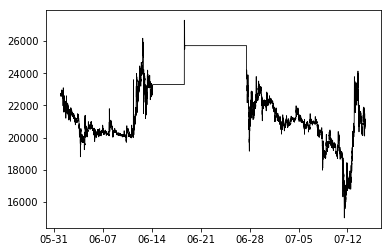

In [15]:
import matplotlib.dates as mdates
def show_plot(column):
    fig, ax = plt.subplots()
    myFmt = mdates.DateFormatter('%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    ax.plot(etc['datetime_id'], etc['last'], c='black', linewidth=0.8)
    plt.show();
show_plot('last')

### 에러 이후 데이터만 사용

In [16]:
etc = etc[etc.ix[:, 0] > pd.datetime(2017, 6, 27, 13, 36)]
etc = etc.reset_index().drop('index', axis=1)
etc.head()
etc.shape

,datetime_id,last,diff_per_24h,low,high,volume
0,2017-06-27 13:37:00,23650.0,-8.048212,20100.0,25820.0,839538.953243
1,2017-06-27 13:38:00,23700.0,-7.853810,20100.0,25820.0,841029.097801
2,2017-06-27 13:39:00,23700.0,-7.853810,20100.0,25820.0,841029.097801
3,2017-06-27 13:40:00,23700.0,-7.853810,20100.0,25820.0,842350.250316
4,2017-06-27 13:41:00,23750.0,-7.659409,20100.0,25820.0,842559.498064


(24462, 6)

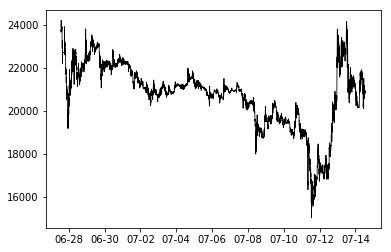

In [17]:
show_plot('last')

## Train data, Test data 분리

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(201)

## Normalize dataset

In [25]:
dataset = etc['last'].values
dataset.astype('float32')

array([ 23650.,  23700.,  23700., ...,  20830.,  20850.,  20900.], dtype=float32)

In [28]:
dataset = dataset.reshape(len(dataset), 1)

In [29]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(dataset)
scalerd_X = scaler.transform(dataset)

## Train data, Test data 분리

In [35]:
train_size = int(len(scalerd_X) * 0.8)
test_size = len(scalerd_X) - train_size
train_size, test_size

(19569, 4893)

In [38]:
train, test = scalerd_X[0:train_size, :], scalerd_X[train_size:len(scalerd_X), :]
train.shape, test.shape

((19569, 1), (4893, 1))

In [40]:
train[:5]

array([[ 0.88030468],
       [ 0.89118607],
       [ 0.89118607],
       [ 0.89118607],
       [ 0.90206746]])

## convert an array of values into a dataset matrix

In [43]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [65]:
create_dataset(np.array([112, 118, 132, 129, 121]).reshape(-1, 1), 1)

(array([[112],
        [118],
        [132]]), array([118, 132, 129]))

## X=t, y=t+1로 바꾸기

In [119]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## [sample, time step, feature] 형태로 바꾸기

In [120]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# 네트워크 구성하기

In [76]:
LR = 0.0003
MODEL_NAME = "LSTM-{}-{}".format(LR, "basic")

tf.reset_default_graph()

net = tflearn.input_data(shape=[None, 1, 1], name="input")
net = tflearn.lstm(net, 8)
net = tflearn.fully_connected(net, 1, activation="linear")
net = tflearn.regression(
    net, 
    optimizer="adam", 
    learning_rate=LR, 
    loss="mean_square",
    name="targets"
)

model = tflearn.DNN(net, tensorboard_dir="log")

In [80]:
model.fit(
    {"input": X_train},
    {"targets": y_train.reshape(-1, 1)},
    n_epoch=2,
    validation_set=(
        {"input": X_test},
        {"targets": y_test}
    ),
    snapshot_step=500,
    show_metric=True,
    run_id=MODEL_NAME
)

Training Step: 1224  | total loss: 0.01362 | time: 2.666s
| Adam | epoch: 005 | loss: 0.01362 - binary_acc: 0.0000 -- iter: 19520/19567
Training Step: 1225  | total loss: 0.01335 | time: 3.690s
| Adam | epoch: 005 | loss: 0.01335 - binary_acc: 0.0000 | val_loss: 0.10062 - val_acc: 0.0000 -- iter: 19567/19567
--


In [83]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [87]:
train_predict.shape

(19567, 1)

In [88]:
from math import sqrt
train_score = sqrt(mean_squared_error(y_train, train_predict[:, 0]))
test_score = sqrt(mean_squared_error(y_test, test_predict[:, 0]))

In [89]:
print("Train score: {:.2f} RMSE".format(train_score))
print("Test score: {:.2f} RMSE".format(test_score))

Train score: 507.08 RMSE
Test score: 1457.55 RMSE


In [92]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back] = train_predict

In [93]:
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(dataset)-1] = test_predict

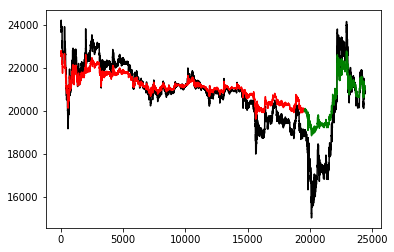

In [107]:
plt.plot(dataset, c='black', label='true')
plt.plot(train_predict_plot, c='red', label='train')
plt.plot(test_predict_plot, c='green', label='test')
plt.show();

# 다른 네트워크

In [110]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [109]:
LR = 0.0003
MODEL_NAME = "LSTM-{}-{}".format(LR, "another")

tf.reset_default_graph()

net = tflearn.input_data(shape=[None, 1, 1], name="input")
net = tflearn.lstm(net, 16, return_seq=True)
net = tflearn.lstm(net, 8)
net = tflearn.fully_connected(net, 100, activation="linear")
net = tflearn.dropout(net, 0.8)
net = tflearn.fully_connected(net, 1, activation="linear")
net = tflearn.regression(
    net, 
    optimizer="adam", 
    learning_rate=LR, 
    loss="mean_square",
    name="targets"
)

model = tflearn.DNN(net, tensorboard_dir="log")

In [111]:
model.fit(
    {"input": X_train},
    {"targets": y_train},
    n_epoch=3,
    validation_set=(
        {"input": X_test},
        {"targets": y_test}
    ),
    snapshot_step=500,
    show_metric=True,
    run_id=MODEL_NAME
)

Training Step: 917  | total loss: 0.00075 | time: 2.212s
| Adam | epoch: 003 | loss: 0.00075 - binary_acc: 0.0000 -- iter: 19520/19567
Training Step: 918  | total loss: 0.00075 | time: 3.235s
| Adam | epoch: 003 | loss: 0.00075 - binary_acc: 0.0000 | val_loss: 0.01545 - val_acc: 0.0000 -- iter: 19567/19567
--


In [121]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\WinterJ\Documents\GitHub\python\Code_Study\Machine_Learning\kakao_study\LSTM-0.0003-another is not in all_model_checkpoint_paths. Manually adding it.
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'list' object has no attribute 'name'


In [112]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [113]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [114]:
from math import sqrt
train_score = sqrt(mean_squared_error(y_train, train_predict[:, 0]))
test_score = sqrt(mean_squared_error(y_test, test_predict[:, 0]))

In [115]:
print("Train score: {:.2f} RMSE".format(train_score))
print("Test score: {:.2f} RMSE".format(test_score))

Train score: 89.95 RMSE
Test score: 571.12 RMSE


In [116]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back] = train_predict

In [117]:
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(dataset)-1] = test_predict

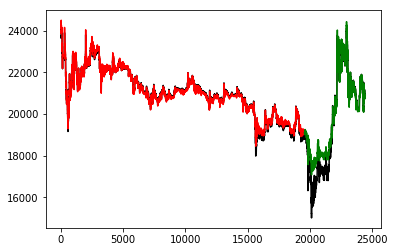

In [147]:
plt.plot(dataset, c='black', label='true')
plt.plot(train_predict_plot, c='red', label='train')
plt.plot(test_predict_plot, c='green', label='test')
plt.show();

# 미래 예측하기

In [160]:
loop = 10000

In [161]:
last = X_test[-1]
history = []
for i in range(loop):
    new = model.predict([last])
    history.append(new)
    last = new

In [162]:
more_predict = scaler.inverse_transform([np.array(history).flatten()])

In [163]:
more_predict.flatten().shape

(10000,)

In [168]:
more_predict_plot = np.empty((dataset.shape[0] + loop, 1))
more_predict_plot.shape

(34462, 1)

In [171]:
more_predict_plot[:] = np.nan
more_predict_plot[len(dataset):] = more_predict.reshape(-1, 1)

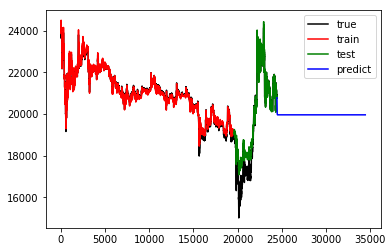

In [173]:
plt.plot(dataset, c='black', label='true')
plt.plot(train_predict_plot, c='red', label='train')
plt.plot(test_predict_plot, c='green', label='test')
plt.plot(more_predict_plot, c='blue', label='predict')
plt.legend()
plt.show();

# 결론: 무쓸모 (?)